Import des librairies

In [1]:
import pandas as pd
import requests
import shap
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Importation des données

In [2]:
df = pd.read_csv('C:/Users/smart asus/P7_données/code_vs_code/analyse_nettoyage_experiences/Data_for_test/test_data.csv')
df

,Unnamed: 0,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,CC_AMT_PAYMENT_TOTAL_CURRENT_MEAN,CC_AMT_PAYMENT_TOTAL_CURRENT_VAR,CC_CNT_DRAWINGS_ATM_CURRENT_SUM,CC_CNT_DRAWINGS_CURRENT_MAX,CC_CNT_DRAWINGS_CURRENT_MEAN,CC_CNT_DRAWINGS_CURRENT_SUM,CC_CNT_DRAWINGS_CURRENT_VAR,CC_CNT_INSTALMENT_MATURE_CUM_MAX,CC_NAME_CONTRACT_STATUS_Active_MEAN,CC_NAME_CONTRACT_STATUS_Active_VAR
0,307507,1,0,0,135000.0,568800.0,20560.5,0.018850,-19241,-2329.0,...,3986.601378,3.508893e+07,3.0,3.0,0.205128,8.0,0.467400,7.0,1.0,0.0
1,307508,0,0,0,99000.0,222768.0,17370.0,0.035792,-18064,-4469.0,...,3986.601378,3.508893e+07,3.0,3.0,0.205128,8.0,0.467400,7.0,1.0,0.0
2,307509,0,1,0,202500.0,663264.0,69777.0,0.019101,-20038,-4458.0,...,6817.172344,4.722214e+08,23.0,7.0,0.239583,23.0,1.320943,22.0,1.0,0.0
3,307510,1,0,2,315000.0,1575000.0,49018.5,0.026392,-13976,-1866.0,...,5606.152347,2.143121e+07,2.0,12.0,2.387755,117.0,8.075680,35.0,1.0,0.0
4,307511,0,1,1,180000.0,625500.0,32067.0,0.010032,-13040,-2191.0,...,3986.601378,3.508893e+07,3.0,3.0,0.205128,8.0,0.467400,7.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,356246,1,0,0,121500.0,412560.0,17473.5,0.002042,-19970,-5169.0,...,3986.601378,3.508893e+07,3.0,3.0,0.205128,8.0,0.467400,7.0,1.0,0.0
48740,356247,1,0,2,157500.0,622413.0,31909.5,0.035792,-11186,-1149.0,...,3986.601378,3.508893e+07,3.0,3.0,0.205128,8.0,0.467400,7.0,1.0,0.0
48741,356248,1,1,1,202500.0,315000.0,33205.5,0.026392,-15922,-3037.0,...,3986.601378,3.508893e+07,3.0,3.0,0.205128,8.0,0.467400,7.0,1.0,0.0
48742,356249,0,0,0,225000.0,450000.0,25128.0,0.018850,-13968,-2731.0,...,3986.601378,3.508893e+07,3.0,3.0,0.205128,8.0,0.467400,7.0,1.0,0.0


Rentrez le nuéméo du client

In [25]:
id = 1

In [26]:
data_prediction =df.iloc[[id]]

Transformation de notre donnée en format json

In [27]:
data_pred_json = data_prediction.to_dict(orient='records')

Réponse de la requête issu de notre api

In [28]:
result=requests.post(url="https://apideploy-dmc3.onrender.com/predict",json=data_pred_json).json()

Extraction de nos résultats

In [29]:
prediction = result["prediction"]
probability = result["probability"]
shap_values_data = result["shap_values"]
feature_globale = result["feature_global"]

Prédiction du modèle pour ce client

In [30]:
print("La prédiction pour le client numéro" ,id+1," est de", prediction)

La prédiction pour le client numéro 2  est de 1.0


Tableau des probabilités d'accord et de refus

In [31]:
# Créer un DataFrame avec deux colonnes
if prediction ==0:
    prediction_probability = pd.DataFrame({"numéro_client":[id+1],"prediction": [prediction], "probability of approval": [probability*100], "probability of rejection":[(1-probability)*100]})
else:
    prediction_probability = pd.DataFrame({"numéro_client":[id+1],"prediction": [prediction], "probability of approval": [(1-probability)*100], "probability of rejection":[probability*100]})
prediction_probability

,numéro_client,prediction,probability of approval,probability of rejection
0,2,1.0,44.0,56.0


In [32]:
if prediction == 0:
    print("La probabilité d'attribution du crédit au client numéro", id+1,"est de", round(probability*100,1), "%")
    print("La probabilité de non attribution du crédit au client numéro", id+1,"est de", round((1-probability)*100,1), "%")
else:
    print("La probabilité d'attribution du crédit au client numéro", id+1,"est de", round((1-probability)*100,1), "%")
    print("La probabilité de non attribution du crédit au client numéro", id+1,"est de", round(probability*100,1), "%")

La probabilité d'attribution du crédit au client numéro 2 est de 44.0 %
La probabilité de non attribution du crédit au client numéro 2 est de 56.0 %


Affichage des features locales pour le client en question

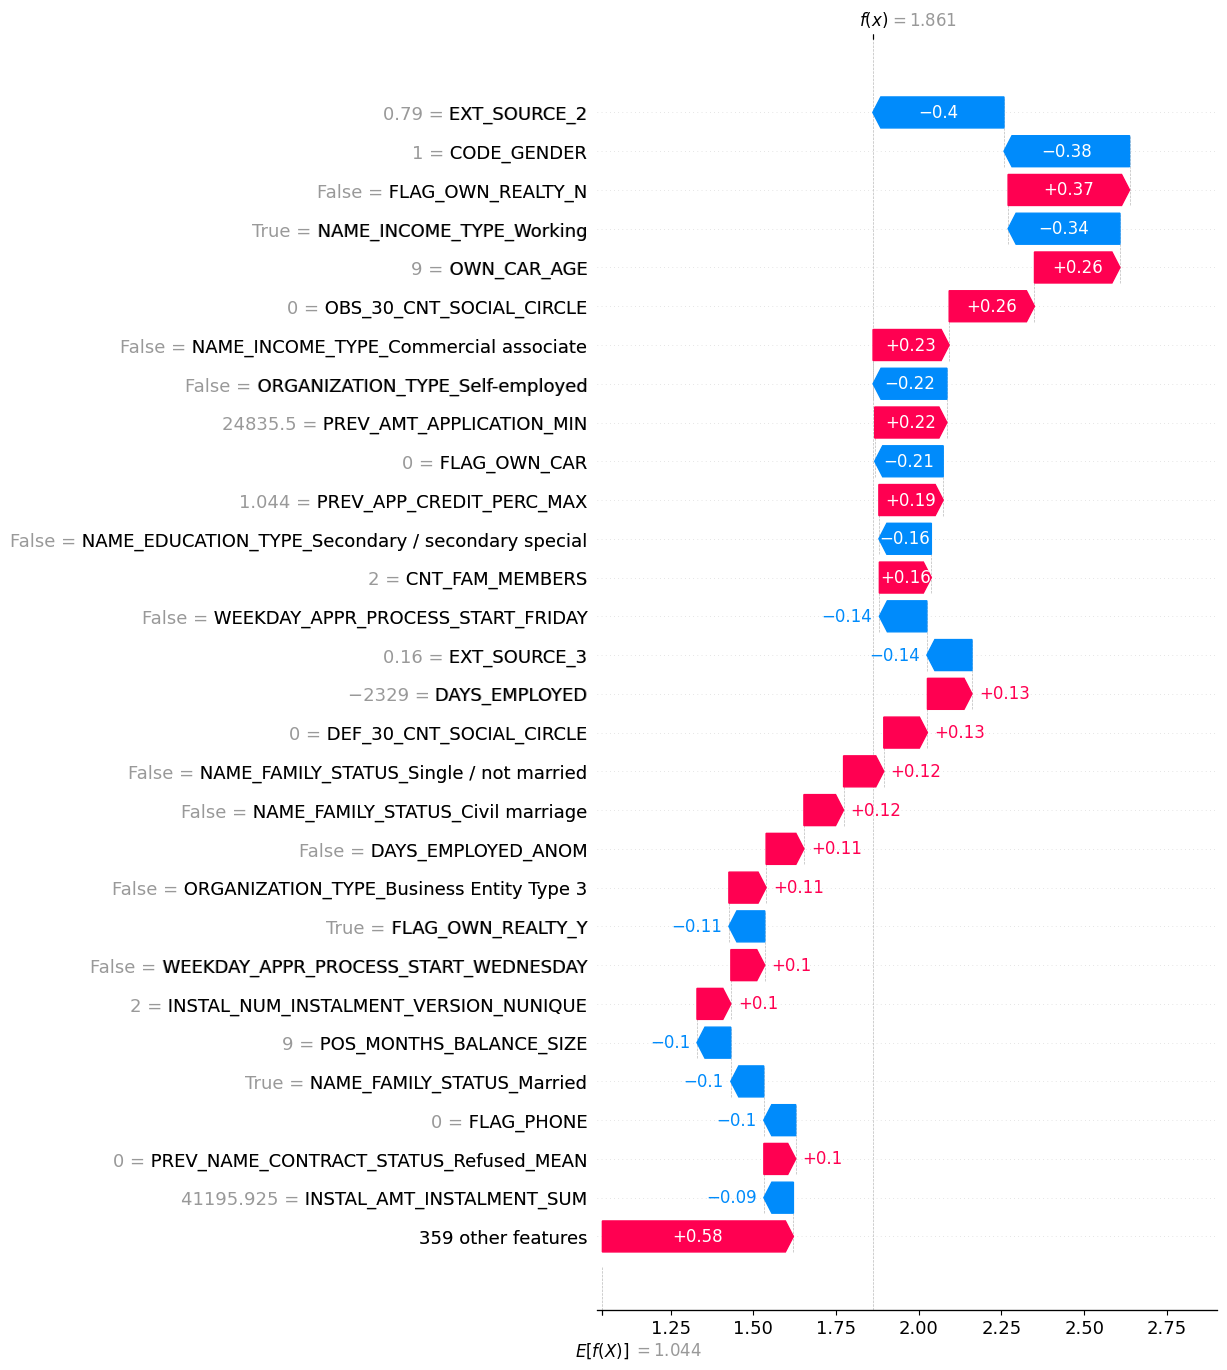

In [33]:
shap_values_data
exp = shap.Explanation(np.array(shap_values_data['values']),np.array(shap_values_data['base_values']), df.drop(columns=df.columns[0]))
shap.plots.waterfall(exp[0], max_display=30, show=True)

Affichage des features globales

<AxesSubplot: xlabel='importance', ylabel='feature'>

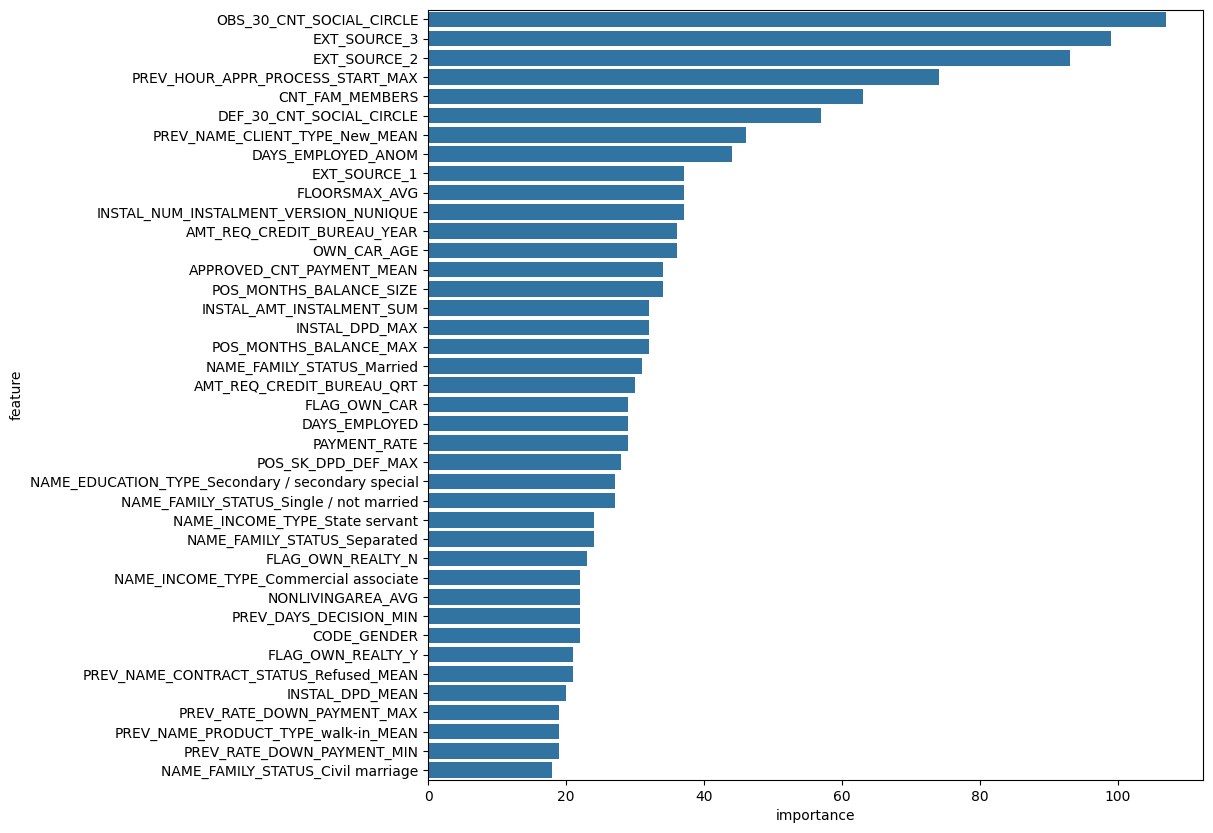

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x="importance", y="feature", data=pd.DataFrame(feature_globale))